In [44]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b0a4f661-e63c-4131-906b-41c716d22286',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#had to increase the data rate limit by "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"

{'status': {'timestamp': '2023-12-22T18:06:04.664Z', 'error_code': 0, 'error_message': None, 'elapsed': 49, 'credit_count': 1, 'notice': None, 'total_count': 8941}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10675, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [45]:
type(data)

dict

In [46]:
import pandas as pd


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [47]:
#this will normalize the json data and make it pretty
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10675,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19577575.00000,19577575.00000,False,NaN,1,NaN,NaN,None,2023-12-22T18:05:00.000Z,43743.31776,21705338536.95450,-12.04200,0.29807,0.48208,4.43783,19.59008,40.76149,64.41086,856388084109.07275,51.39810,918609672867.57996,None,2023-12-22T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-22 10:06:06.014984
1,1027,Ethereum,ETH,ethereum,8088,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120184983.36235,120184983.36235,True,NaN,2,NaN,NaN,None,2023-12-22T18:05:00.000Z,2331.72263,16467233093.92930,21.50440,0.40392,4.31046,4.46980,14.65246,37.74513,46.47694,280238045593.44830,16.81910,280238045593.45001,None,2023-12-22T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-22 10:06:06.014984
2,825,Tether USDt,USDT,tether,69428,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,91070549995.13553,93603058351.60144,True,NaN,3,NaN,NaN,None,2023-12-22T18:04:00.000Z,1.00068,54445748264.04022,8.79780,0.02177,0.04905,0.09858,0.05833,0.01318,0.06314,91132300528.91188,5.46950,93666526056.77000,None,2023-12-22T18:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-22 10:06:06.014984
3,1839,BNB,BNB,bnb,1908,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151694180.44064,151694180.44064,False,NaN,4,NaN,NaN,None,2023-12-22T18:04:00.000Z,270.97673,1035584864.97193,-12.85560,0.38087,0.32533,10.07490,16.50162,22.66972,28.71465,41105592796.42115,2.46700,41105592796.42000,None,2023-12-22T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-22 10:06:06.014984
4,5426,Solana,SOL,solana,563,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,427334350.05685,565382832.95859,True,NaN,5,NaN,NaN,None,2023-12-22T18:04:00.000Z,95.42209,5534546921.94997,21.27190,1.29124,2.79088,27.34257,72.95942,224.21791,390.87023,40777136513.93002,2.44730,53950011177.71000,None,2023-12-22T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-22 10:06:06.014984
5,52,XRP,XRP,xrp,1185,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54065019376.00000,99988129668.00000,False,NaN,6,NaN,NaN,None,2023-12-22T18:05:00.000Z,0.61980,1419812971.42749,15.57000,0.33085,0.47026,-0.15553,3.38701,16.20093,21.38772,33509469691.84550,2.01110,61979945773.81000,None,2023-12-22T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-22 10:06:06.014984
6,3408,USDC,USDC,usd-coin,15701,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24840581631.78933,24840581631.78933,False,NaN,7,NaN,NaN,None,2023-12-22T18:04:00.000Z,1.00015,6525115940.08626,10.19170,-0.01251,0.00410,-0.01862,0.00766,0.01459,0.01133,24844363193.71034,1.49110,24844363193.71000,None,2023-12-22T18:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-22 10:06:06.014984
7,2010,Cardano,ADA,cardano,1010,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35347125427.96400,36469543873.58200,False,NaN,8,NaN,NaN,None,2023-12-22T18:04:00.000Z,0.61819,963290281.63974,30.30320,0.53662,-0.45413,0.04549,66.85247,131.64836,151.30216,21851256895.25285,1.31150,27818572186.03000,None,2023-12-22T18:04:00.000Z,NaN,NaN,N

In [48]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b0a4f661-e63c-4131-906b-41c716d22286',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
 # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'/Users/manishpatil/Downloads/Python Tutorials/Python Web Scraping/API.csv'):
        df.to_csv(r'/Users/manishpatil/Downloads/Python Tutorials/Python Web Scraping/API.csv', header = 'column_names')
    else:
        df.to_csv(r'/Users/manishpatil/Downloads/Python Tutorials/Python Web Scraping/API.csv', mode = 'a', header = False)     
        

In [49]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [50]:
df30 = pd.read_csv(r'/Users/manishpatil/Downloads/Python Tutorials/Python Web Scraping/API.csv')
df30

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10675,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19577162.00000,19577162.00000,False,NaN,1,NaN,NaN,NaN,2023-12-22T07:15:00.000Z,43951.36102,23681163702.08805,-17.78310,-0.42631,0.21477,3.10412,20.39770,43.33382,65.31303,860442914797.25610,51.79740,922978581407.38000,NaN,2023-12-22T07:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-21 23:16:06.037037
1,1,1027,Ethereum,ETH,ethereum,8083,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120184983.36235,120184983.36235,True,NaN,2,NaN,NaN,NaN,2023-12-22T07:15:00.000Z,2277.12972,14048631332.02071,8.12380,0.86219,2.65789,0.73047,14.21130,35.23523,42.79735,273676797366.45251,16.47490,273676797366.45001,NaN,2023-12-22T07:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-21 23:16:06.037037
2,2,825,Tether USDt,USDT,tether,69356,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,91070549995.13551,93603058351.60144,True,NaN,3,NaN,NaN,NaN,2023-12-22T07:14:00.000Z,1.00019,53505209396.26568,3.37980,-0.03504,0.03577,0.00710,-0.01697,-0.01503,0.02246,91088159693.06081,5.48340,93621157743.58000,NaN,2023-12-22T07:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-21 23:16:06.037037
3,3,1839,BNB,BNB,bnb,1907,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151694276.89127,151694276.89127,False,NaN,4,NaN,NaN,NaN,2023-12-22T07:14:00.000Z,270.94507,1232457221.13532,25.33160,-1.67418,3.71682,8.26497,15.39140,23.04502,28.49765,41100817104.00002,2.47420,41100817104.00000,NaN,2023-12-22T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-21 23:16:06.037037
4,4,5426,Solana,SOL,solana,563,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,427336772.53485,565383704.47211,True,NaN,5,NaN,NaN,NaN,2023-12-22T07:14:00.000Z,94.76849,5599165321.73334,30.36240,-3.30184,9.84412,25.36173,73.74789,213.27088,386.36529,40498059368.23903,2.43790,53580558241.52000,NaN,2023-12-22T07:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-21 23:16:06.037037
5,5,52,XRP,XRP,xrp,1185,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54065019376.00000,99988129668.00000,False,NaN,6,NaN,NaN,NaN,2023-12-22T07:15:00.000Z,0.61933,1237494858.66074,-8.61140,-0.36601,0.87129,-1.68871,4.27378,18.47962,20.66094,33483882808.21721,2.01570,61932619639.61000,NaN,2023-12-22T07:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-21 23:16:06.037037
6,6,3408,USDC,USDC,usd-coin,15691,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,24781066951.46776,24781066951.46776,False,NaN,7,NaN,NaN,NaN,2023-12-22T07:14:00.000Z,1.00010,6435037065.21111,6.45370,-0.01692,0.01162,0.01197,0.00314,0.02498,0.00628,24783571645.80413,1.49150,24783571645.80000,NaN,2023-12-22T07:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-21 23:16:06.037037
7,7,2010,Cardano,ADA,cardano,1009,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35347148405.24100,36469543873.58200,False,NaN,8,NaN,NaN,NaN,2023-12-22T07:14:00.000Z,0.62127,1069304863.06629,62.69700,-2.58165,4.34320,-1.42501,68.24567,134.89660,153.03539,21960143099.97912,1.32200,27957175729.42000,NaN,2023-12-22T07:14:00

In [51]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10675,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19577643.00000,19577643.00000,False,NaN,1,NaN,NaN,None,2023-12-22T18:12:00.000Z,43761.99524,21674179050.01831,-12.14320,0.26856,0.39659,4.50341,19.47579,40.72628,64.35865,856756719822.86511,51.34930,919001900089.81995,None,2023-12-22T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-22 10:13:10.199534
1,1027,Ethereum,ETH,ethereum,8088,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120184983.36235,120184983.36235,True,NaN,2,NaN,NaN,None,2023-12-22T18:11:00.000Z,2334.11765,16472243397.90581,21.61490,0.33145,4.38522,4.52458,14.68041,37.73484,46.45749,280525890828.81134,16.82580,280525890828.81000,None,2023-12-22T18:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-22 10:13:10.199534
2,825,Tether USDt,USDT,tether,69428,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,91070549995.13553,93603058351.60144,True,NaN,3,NaN,NaN,None,2023-12-22T18:11:00.000Z,1.00049,54434284338.54650,8.86400,0.00259,0.03743,0.05972,0.02246,0.00277,0.03547,91115114709.65097,5.46500,93648862330.75000,None,2023-12-22T18:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-22 10:13:10.199534
3,1839,BNB,BNB,bnb,1908,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151694159.39559,151694159.39559,False,NaN,4,NaN,NaN,None,2023-12-22T18:11:00.000Z,271.50465,1036394627.84551,-12.93680,0.34854,0.39295,10.12101,16.68835,22.84682,28.91591,41185669957.08428,2.47030,41185669957.08000,None,2023-12-22T18:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-22 10:13:10.199534
4,5426,Solana,SOL,solana,563,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,427334053.15587,565382595.42682,True,NaN,5,NaN,NaN,None,2023-12-22T18:11:00.000Z,96.17193,5546118284.95744,21.61380,1.54336,3.31846,27.52402,74.04854,226.01521,394.60895,41097539773.41187,2.46500,54373934235.18000,None,2023-12-22T18:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-22 10:13:10.199534
5,52,XRP,XRP,xrp,1185,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54065019376.00000,99988129668.00000,False,NaN,6,NaN,NaN,None,2023-12-22T18:12:00.000Z,0.62003,1419655918.75971,15.44590,0.16538,0.44261,-0.21159,3.18604,16.17359,21.45065,33522201704.48038,2.00910,62003495219.98000,None,2023-12-22T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-22 10:13:10.199534
6,3408,USDC,USDC,usd-coin,15701,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24882168912.38316,24882168912.38316,False,NaN,7,NaN,NaN,None,2023-12-22T18:11:00.000Z,1.00018,6516158506.65589,10.38320,-0.00211,0.01214,-0.02101,0.01603,0.02032,0.00821,24886546201.59881,1.49240,24886546201.60000,None,2023-12-22T18:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-22 10:13:10.199534
7,2010,Cardano,ADA,cardano,1010,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35347131518.86200,36469543873.58200,False,NaN,8,NaN,NaN,None,2023-12-22T18:11:00.000Z,0.61919,959102165.18428,30.03610,0.30076,-0.36882,0.09449,66.94594,132.06956,151.53680,21886738771.61517,1.31280,27863738934.43000,None,2023-12-22T18:11:00.000Z,NaN,NaN,N

In [52]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.26856,0.39659,4.50341,19.47579,40.72628,64.35865
Ethereum,0.33145,4.38522,4.52458,14.68041,37.73484,46.45749
Tether USDt,0.00259,0.03743,0.05972,0.02246,0.00277,0.03547
BNB,0.34854,0.39295,10.12101,16.68835,22.84682,28.91591
Solana,1.54336,3.31846,27.52402,74.04854,226.01521,394.60895
XRP,0.16538,0.44261,-0.21159,3.18604,16.17359,21.45065
USDC,-0.00211,0.01214,-0.02101,0.01603,0.02032,0.00821
Cardano,0.30076,-0.36882,0.09449,66.94594,132.06956,151.53680
Avalanche,0.84664,-2.30555,13.15951,125.96913,350.92374,408.74049


In [53]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.26856
             quote.USD.percent_change_24h     0.39659
             quote.USD.percent_change_7d      4.50341
             quote.USD.percent_change_30d    19.47579
             quote.USD.percent_change_60d    40.72628
             quote.USD.percent_change_90d    64.35865
Ethereum     quote.USD.percent_change_1h      0.33145
             quote.USD.percent_change_24h     4.38522
             quote.USD.percent_change_7d      4.52458
             quote.USD.percent_change_30d    14.68041
             quote.USD.percent_change_60d    37.73484
             quote.USD.percent_change_90d    46.45749
Tether USDt  quote.USD.percent_change_1h      0.00259
             quote.USD.percent_change_24h     0.03743
             quote.USD.percent_change_7d      0.05972
             quote.USD.percent_change_30d     0.02246
             quote.USD.percent_change_60d     0.00277
             quote.USD.percent_change_90

In [54]:
type(df4)

pandas.core.series.Series

In [55]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.26856
            quote.USD.percent_change_24h   0.39659
            quote.USD.percent_change_7d    4.50341
            quote.USD.percent_change_30d  19.47579
            quote.USD.percent_change_60d  40.72628
            quote.USD.percent_change_90d  64.35865
Ethereum    quote.USD.percent_change_1h    0.33145
            quote.USD.percent_change_24h   4.38522
            quote.USD.percent_change_7d    4.52458
            quote.USD.percent_change_30d  14.68041
            quote.USD.percent_change_60d  37.73484
            quote.USD.percent_change_90d  46.45749
Tether USDt quote.USD.percent_change_1h    0.00259
            quote.USD.percent_change_24h   0.03743
            quote.USD.percent_change_7d    0.05972
            quote.USD.percent_change_30d   0.02246
            quote.USD.percent_change_60d   0.00277
            quote.USD.percent_change_90d   0.03547
BNB         quote.USD.percent_change_1h    0.34854
            quote.USD.percent_change_24h   0.39295
            quote.USD.percent_change_7d   10.12101
            quote.USD.percent_change_30d  16.68835
            quote.USD.percent_change_60d  22.84682
            quote.USD.percent_change_90d  28.91591
Solana      quote.USD.percent_change_1h    1.54336
            quote.USD.percent_change_24h   3.31846
            quote.USD.percent_change_7d   27.52402
            quote.USD.percent_change_30d  74.04854
            quote.USD.percent_change_60d 226.01521
            quote.USD.percent_change_90d 394.60895
XRP         quote.USD.percent_change_1h    0.16538
            quote.USD.percent_change_24h   0.44261
            quote.USD.percent_change_7d   -0.21159
            quote.USD.percent_change_30d   3.18604
            quote.USD.percent_change_60d  16.17359
            quote.USD.percent_change_90d  21.45065
USDC        quote.USD.percent_change_1h   -0.00211
            quote.USD.percent_change_24h   0.01214
            quote.USD.percent_change_7d   -0.02101
            quote.USD.percent_change_30d   0.01603
            quote.USD.percent_change_60d   0.02032
            quote.USD.percent_change_90d   0.00821
Cardano     quote.USD.percent_change_1h    0.30076
            quote.USD.percent_change_24h  -0.36882
            quote.USD.percent_change_7d    0.09449
            quote.USD.percent_change_30d  66.94594
            quote.USD.percent_change_60d 132.06956
            quote.USD.percent_change_90d 151.53680
Avalanche   quote.USD.percent_change_1h    0.84664
            quote.USD.percent_change_24h  -2.30555
            quote.USD.percent_change_7d   13.15951
            quote.USD.percent_change_30d 125.96913
            quote.USD.percent_change_60d 350.92374
            quote.USD.percent_change_90d 408.74049
Dogecoin    quote.USD.percent_change_1h    0.18425
            quote.USD.percent_change_24h   2.70061
            quote.USD.percent_change_7d   -0.36682
            quote.USD.percent_change_30d  25.24005
            quote.USD.percent_change_60d  47.01522
            quote.USD.percent_change_90d  52.68448
Polkadot    quote.USD.percent_change_1h    0.05724
            quote.USD.percent_change_24h  -0.83749
            quote.USD.percent_change_7d   13.37269
            quote.USD.percent_change_30d  56.42027
            quote.USD.percent_change_60d  93.76445
            quote.USD.percent_change_90d  99.88338
TRON        quote.USD.percent_change_1h    0.11018
            quote.USD.percent_change_24h   0.44290
            quote.USD.percent_change_7d    1.98697
            quote.USD.percent_change_30d   4.40813
            quote.USD.percent_change_60d  15.15466
            quote.USD.percent_change_90d  25.18359
Chainlink   quote.USD.percent_change_1h   -0.45771
            quote.USD.percent_change_24h   3.51392
            quote.USD.percent_change_7d    5.32851
            quote.USD.percent_change_30d   9.20382
            quote.USD.percent_change_60d  51.36217
            quo

In [56]:
df5.count()

values    90
dtype: int64

In [57]:
#we want index instead of the name column...so,

index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.26856
1,Bitcoin,quote.USD.percent_change_24h,0.39659
2,Bitcoin,quote.USD.percent_change_7d,4.50341
3,Bitcoin,quote.USD.percent_change_30d,19.47579
4,Bitcoin,quote.USD.percent_change_60d,40.72628
5,Bitcoin,quote.USD.percent_change_90d,64.35865
6,Ethereum,quote.USD.percent_change_1h,0.33145
7,Ethereum,quote.USD.percent_change_24h,4.38522
8,Ethereum,quote.USD.percent_change_7d,4.52458
9,Ethereum,quote.USD.percent_change_30d,14.68041


In [58]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.26856
1,Bitcoin,quote.USD.percent_change_24h,0.39659
2,Bitcoin,quote.USD.percent_change_7d,4.50341
3,Bitcoin,quote.USD.percent_change_30d,19.47579
4,Bitcoin,quote.USD.percent_change_60d,40.72628
5,Bitcoin,quote.USD.percent_change_90d,64.35865
6,Ethereum,quote.USD.percent_change_1h,0.33145
7,Ethereum,quote.USD.percent_change_24h,4.38522
8,Ethereum,quote.USD.percent_change_7d,4.52458
9,Ethereum,quote.USD.percent_change_30d,14.68041


In [59]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.26856
1,Bitcoin,24h,0.39659
2,Bitcoin,7d,4.50341
3,Bitcoin,30d,19.47579
4,Bitcoin,60d,40.72628
5,Bitcoin,90d,64.35865
6,Ethereum,1h,0.33145
7,Ethereum,24h,4.38522
8,Ethereum,7d,4.52458
9,Ethereum,30d,14.68041


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/manishpatil/Downloads/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


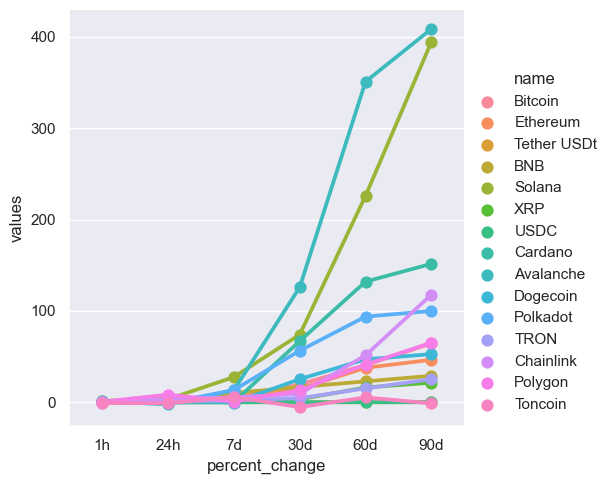

In [61]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')